In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

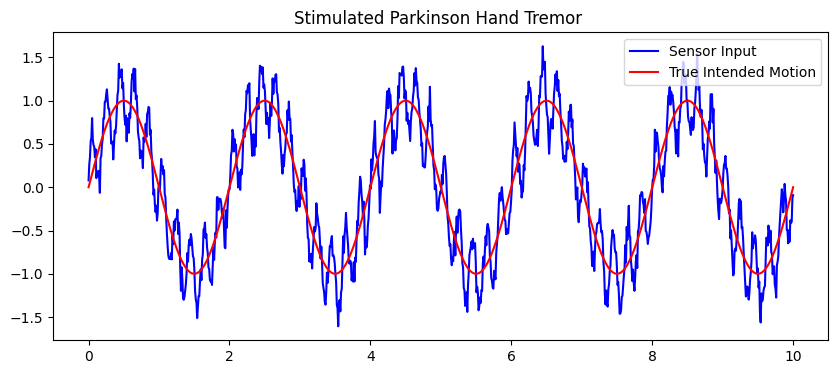

In [21]:
t = np.linspace(0, 10, 1000)
intended_motion = 1.0 * np.sin(2 * np.pi * 0.5 * t) #it is the sin equation 'asin(2*pi*freq*time)'
tremor_motion = 0.4* np.sin(2 * np.pi * 5 *t )
random_noise = 0.1 * np.random.normal(size=len(t)) #white noise
raw_signal = intended_motion + tremor_motion + random_noise

plt.figure(figsize=(10,4))
plt.plot( t, raw_signal, label = "Sensor Input", color= 'blue')
plt.plot ( t, intended_motion, label = "True Intended Motion", color = 'red')
plt.title ( "Stimulated Parkinson Hand Tremor ")
plt.legend()
plt.show()

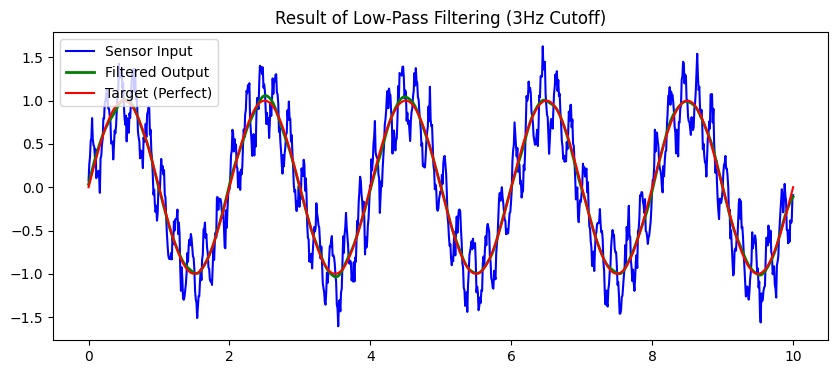

In [22]:
#The filter design
fs= 100 #sample rate
cutoff= 3.0
order = 4 #aggression of the filter

b , a = signal.butter( 4 , cutoff,fs=fs, btype='low', analog=False)
filtered_signal = signal.filtfilt(b,a,raw_signal) #zero-phase filter


plt.figure(figsize=(10, 4))
plt.plot(t, raw_signal, label='Sensor Input', color='blue')
plt.plot(t, filtered_signal, label='Filtered Output', color='green', linewidth=2)
plt.plot(t, intended_motion, label='Target (Perfect)', color='red', alpha=1)
plt.title("Result of Low-Pass Filtering (3Hz Cutoff)")
plt.legend()
plt.show()


In [23]:
# Calculate Error (RMSE - Root Mean Square Error)
original_error = np.sqrt(np.mean((raw_signal - intended_motion)**2))
filtered_error = np.sqrt(np.mean((filtered_signal - intended_motion)**2))

print(f"Original Tremor Error: {original_error:.3f}")
print(f"Post-Filter Error: {filtered_error:.3f}")
print(f"Tremor Reduction: {(original_error - filtered_error) / original_error * 100:.1f}%")

Original Tremor Error: 0.301
Post-Filter Error: 0.021
Tremor Reduction: 92.9%


In [24]:
import sqlite3
import datetime

# 1. Connect to the Database (Creates a file 'tremor_data.db')
conn = sqlite3.connect('tremor_data.db')
cursor = conn.cursor()

# 2. Create Tables (SQL Code)
cursor.execute('''
CREATE TABLE IF NOT EXISTS patients (
    patient_id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER,
    diagnosis TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS sessions (
    session_id INTEGER PRIMARY KEY AUTOINCREMENT,
    patient_id INTEGER,
    tremor_severity REAL,
    filter_cutoff REAL,
    reduction_score REAL,
    timestamp DATETIME,
    FOREIGN KEY(patient_id) REFERENCES patients(patient_id)
)
''')
conn.commit()
print("Database and Tables Created Successfully!")

Database and Tables Created Successfully!


In [35]:
def log_session(patient_id, severity, cutoff, score):
    # Get the current time
    current_time = datetime.datetime.now()

    # Execute the INSERT command
    # The '?' marks are placeholders. Python safely fills them with your variables.
    cursor.execute('''
        INSERT INTO sessions (patient_id, tremor_severity, filter_cutoff, reduction_score, timestamp)
        VALUES (?, ?, ?, ?, ?)
    ''', (patient_id, severity, cutoff, score, current_time))

    # Save the transaction
    conn.commit()
    print(f"Saved log for Patient {patient_id}: Severity {severity}, Cutoff {cutoff}Hz")









In [33]:
import random
import numpy as np
from scipy import signal
import datetime

# Define our Physics constants again (just to be safe)
fs = 100
t = np.linspace(0, 10, 5000)
intended_motion = 1.0 * np.sin(2 * np.pi * 0.5 * t)

def log_session(patient_id, severity, cutoff, score):
    # Get the current time
    current_time = datetime.datetime.now()

    # Execute the INSERT command
    # The '?' marks are placeholders. Python safely fills them with your variables.
    cursor.execute('''
        INSERT INTO sessions (patient_id, tremor_severity, filter_cutoff, reduction_score, timestamp)
        VALUES (?, ?, ?, ?, ?)
    ''', (patient_id, severity, cutoff, score, current_time))

    # Save the transaction
    conn.commit()
    print(f"📝 Saved log for Patient {patient_id}: Severity {severity}, Cutoff {cutoff}Hz")

print("Starting Mini-Simulation...")

# Run the experiment 10 times
for i in range(5000):

    # 1. Randomize Parameters
    # Patient ID (let's pretend we have 5 patients)
    p_id = random.randint(1, 5)
    # Severity (0.1 to 1.0)
    sev = round(random.uniform(0.1, 1.0), 2)
    # Cutoff (1.0 to 5.0 Hz)
    cut = round(random.uniform(1.0, 5.0), 2)

    # 2. Generate Signal (Physics)
    tremor = sev * np.sin(2 * np.pi * 5.0 * t)
    noise = 0.1 * np.random.normal(size=len(t))
    raw_signal = intended_motion + tremor + noise

    # 3. Apply Filter (Engineering)
    b, a = signal.butter(2, cut, fs=fs, btype='low', analog=False)
    filtered_signal = signal.filtfilt(b, a, raw_signal)

    # 4. Calculate Score (Math)
    original_err = np.sqrt(np.mean((raw_signal - intended_motion)**2))
    filtered_err = np.sqrt(np.mean((filtered_signal - intended_motion)**2))
    score = (original_err - filtered_err) / original_err * 100

    # 5. Log it to Database (Data Science)
    log_session(p_id, sev, cut, score)

print("5000 experiments saved to database.")

🚀 Starting Mini-Simulation...
📝 Saved log for Patient 2: Severity 0.44, Cutoff 2.68Hz
📝 Saved log for Patient 4: Severity 0.66, Cutoff 2.57Hz
📝 Saved log for Patient 5: Severity 0.72, Cutoff 3.24Hz
📝 Saved log for Patient 1: Severity 0.61, Cutoff 1.51Hz
📝 Saved log for Patient 1: Severity 0.63, Cutoff 3.15Hz
📝 Saved log for Patient 2: Severity 0.65, Cutoff 4.28Hz
📝 Saved log for Patient 5: Severity 0.63, Cutoff 2.63Hz
📝 Saved log for Patient 4: Severity 0.55, Cutoff 1.36Hz
📝 Saved log for Patient 4: Severity 0.19, Cutoff 1.68Hz
📝 Saved log for Patient 4: Severity 0.64, Cutoff 4.98Hz
📝 Saved log for Patient 3: Severity 0.59, Cutoff 2.49Hz
📝 Saved log for Patient 5: Severity 0.57, Cutoff 4.75Hz
📝 Saved log for Patient 4: Severity 0.34, Cutoff 3.55Hz
📝 Saved log for Patient 4: Severity 0.5, Cutoff 4.24Hz
📝 Saved log for Patient 2: Severity 0.18, Cutoff 4.1Hz
📝 Saved log for Patient 3: Severity 0.14, Cutoff 2.76Hz


/tmp/ipython-input-4225198499.py:17: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  cursor.execute('''


📝 Saved log for Patient 4: Severity 0.44, Cutoff 2.9Hz
📝 Saved log for Patient 2: Severity 0.6, Cutoff 4.54Hz
📝 Saved log for Patient 3: Severity 0.22, Cutoff 3.43Hz
📝 Saved log for Patient 1: Severity 0.21, Cutoff 1.46Hz
📝 Saved log for Patient 4: Severity 0.68, Cutoff 4.09Hz
📝 Saved log for Patient 4: Severity 0.34, Cutoff 3.59Hz
📝 Saved log for Patient 3: Severity 0.26, Cutoff 4.23Hz
📝 Saved log for Patient 3: Severity 0.78, Cutoff 4.05Hz
📝 Saved log for Patient 5: Severity 0.15, Cutoff 3.23Hz
📝 Saved log for Patient 3: Severity 0.21, Cutoff 4.87Hz
📝 Saved log for Patient 3: Severity 0.94, Cutoff 3.95Hz
📝 Saved log for Patient 1: Severity 0.23, Cutoff 1.96Hz
📝 Saved log for Patient 3: Severity 0.76, Cutoff 4.32Hz
📝 Saved log for Patient 5: Severity 0.46, Cutoff 1.16Hz
📝 Saved log for Patient 2: Severity 0.91, Cutoff 3.23Hz
📝 Saved log for Patient 4: Severity 0.48, Cutoff 3.75Hz
📝 Saved log for Patient 2: Severity 0.73, Cutoff 2.13Hz
📝 Saved log for Patient 3: Severity 0.65, Cutoff 3

In [27]:
import pandas as pd

# Read the SQL table into a Dataframe
df = pd.read_sql_query("SELECT * FROM sessions", conn)

# Display it
print(df)
df['severity_x_cutoff'] = df['tremor_severity'] * df['filter_cutoff']
X = df[['tremor_severity', 'filter_cutoff', 'severity_x_cutoff']]


      session_id  patient_id  tremor_severity  filter_cutoff  reduction_score  \
0              1           5             0.49           2.16         8.019698   
1              2           2             0.50           4.22         3.749901   
2              3           5             0.30           2.60        11.011005   
3              4           2             1.00           1.03        47.132317   
4              5           1             0.62           4.62         2.581155   
...          ...         ...              ...            ...              ...   
9995        9996           4             0.32           1.14        42.088554   
9996        9997           3             0.37           4.18         6.305291   
9997        9998           5             0.83           4.27         1.684061   
9998        9999           1             0.58           3.08         3.761979   
9999       10000           1             0.58           4.71         2.806543   

                       time

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. Load your data from the SQL database we built
df = pd.read_sql_query("SELECT * FROM sessions", conn)

# 2. Define Features (X) and Target (y)
# X = The input (Severity of tremor and the Cutoff we tried)
# y = The output (How much the tremor was reduced)
X = df[['tremor_severity', 'filter_cutoff']]
y = df['reduction_score']

# 3. Split the data
# We use 80% to 'teach' the AI and 20% to 'test' if it actually learned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# 1. Initialize the model (100 'trees' or 'doctors' in the forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train (The "Learning" phase)
# The AI looks at X (Severity/Cutoff) and y (Score) and finds the patterns.
model.fit(X_train, y_train)

print("AI Model Trained Successfully!")

AI Model Trained Successfully!


In [30]:
# 1. Make predictions on the test data
predictions = model.predict(X_test)

# 2. Calculate the average error (MAE)
# This tells us, on average, how many % points off the AI's guess is.
mae = mean_absolute_error(y_test, predictions)

print(f"📊 Model Error: {mae:.2f}%")


📊 Model Error: 0.15%


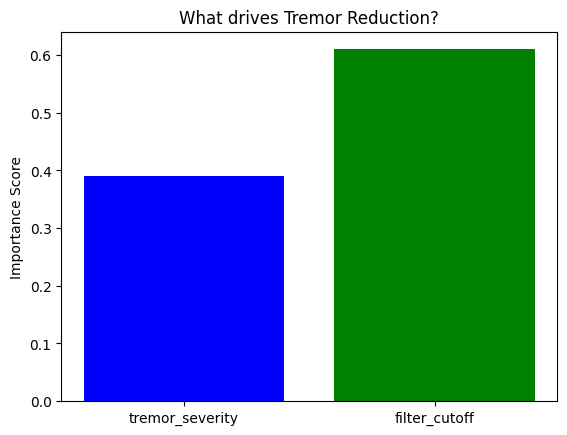

In [31]:
import matplotlib.pyplot as plt

# Get the importance of each feature
importances = model.feature_importances_
feature_names = X.columns

# Plot it
plt.bar(feature_names, importances, color=['blue', 'green'])
plt.title("What drives Tremor Reduction?")
plt.ylabel("Importance Score")
plt.show()


In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"Final Model R2 Score: {r2:.4f}")

Final Model R2 Score: 0.9995
